# **ST1/ST1G Assignment 9 (Capstone Programming Project)**

* UC Student
* Student ID: U3280074 
* Files (from joever): TESLA.csv    linear_regression_model.pkl   teslapredictionproject.ipynb
* github: https://github.com/account2005/uc_capstone_project

### **Project Based on TESLA Stock Price Prediction Dataset, available from Kaggle repository (https://www.kaggle.com/code/princeiornongu/tesla)**

* The Dataset contains the details of Stock prices of TESLA Company.
* The task is to create a ML model that predicts the Stock Price of the next day, demonstrating my knowledge of Python.

### **NOTE: YOU MUST CHANGE THE PATH LOCATION** 

**tesla = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')**

**That is, between (r'{insert_path_where_downloaded})**

#### **Step 1. Reading the Data Set**

* Assumption: file paths are the same and must be changed

In [1]:
import pandas as pd

# Read the dataset
tesla = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv') #MUST CHANGE ACROSS ALL FILES (FOR PERSONAL USE)

# Display the shape before removing duplicate values
print('Shape before deleting duplicate values:', tesla.shape)

# Remove duplicate rows if any
tesla = tesla.drop_duplicates()

# Display the shape after removing duplicate values
print('Shape after deleting duplicate values:', tesla.shape)

# Display the first 10 rows of the dataset
print(tesla.head(10))

Shape before deleting duplicate values: (253, 7)
Shape after deleting duplicate values: (253, 7)
         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-29  259.933319  264.500000  256.893341  260.436676  260.436676   
1  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
3  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
4  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
5  2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   
6  2021-10-07  261.820007  268.333344  261.126678  264.536682  264.536682   
7  2021-10-08  265.403320  265.459991  260.303345  261.829987  261.829987   
8  2021-10-11  262.549988  267.079987  261.833344  263.980011  263.980011   
9  2021-10-12  266.976654  270.773346  265.523346  268.573334  268.573334   

     Volume  
0  62828700  
1  53868000  
2  51094200  

#### **Step 1. Observations**

The Dataset contains multiple attributes related to stock performance, including:

* Date: The date for each record.

* Open: The opening stock price for the day.

* High: The highest stock price for the day.

* Low: The lowest stock price for the day.

* Close: The closing stock price for the day.

* Volume: The trading volume for the day.

#### **Step 2. Problem Statement Definition**



The objective is to predict Tesla's stock closing price for the following day.

The model will use relevant stock market features such as opening price, highest price, lowest price, adjusted closing price, and trading volume.

#### **Step 3. Best Suited ML/AI Algorithm for Data Analysis**

The aim is to predict a continuous numerical value: Tesla's closing stock price.


A regression model is appropriate due to the continuous outputs, unlike classification models, unlike classification models that predict categorical outcomes.

#### **Step 4. Visualising the Distribution of Target Variable**

* The distribution is important. A highly skewed graph may lead to inaccurate predictive modeling.

* Slight positive or negative skewness is acceptable though bell-shaped distributions are preferred.

* Finding any issues such as outliers that negatively impact predictions by removing extreme values.

* Some regression models, like linear regression, perform best with normally distributed targets.





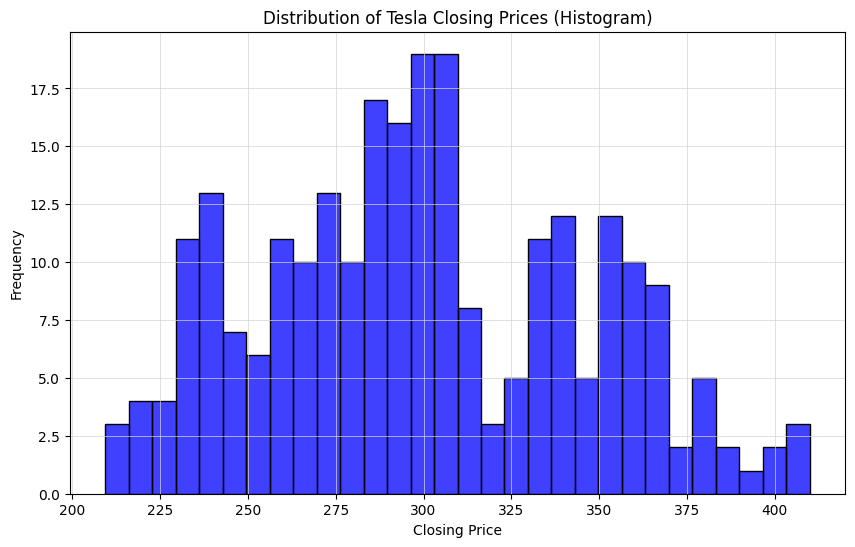

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Tesla stock data from CSV file
tesla = pd.read_csv('/Users/jamesletim/Downloads/joever/TESLA.csv')

# Extract the 'Close' column for closing prices
close_column = tesla['Close']

# Set up the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(close_column, kde=False, bins=30, color='blue')

# Configure plot title and labels
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')

# Add grid lines for clarity
plt.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)

# Display the plot
plt.show()

#### **Step 4. Observations**

* The distribution of closing stock prices are relatively spread out, indicating a balanced distribution. 

* No abnormalities

#### **Step 5. Data Exploration at Basic Level**

* An overview of all the data. It entails evaluating the amount of data as well as the kinds of columns that are included in the dataset. To determine which columns are quantitative, categorical, or qualitative, the data must first be evaluated. The process of rejecting columns or data is aided by this step.

* For basic data exploratory analysis, the following four commands are frequently used:

* head(): Shows a few representative rows of the data.
* info(): Provides a summary of the dataset's contents.
* describe(): Provides the data's descriptive statistical details.
* nunique(): Assists in determining if a column is continuous or categorical.

In [5]:
import pandas as pd

file_path = '/Users/jamesletim/Downloads/joever/TESLA.csv'
tesla_data = pd.read_csv(file_path)

# Display sample rows
print("Sample rows (head) of the data:")
print(tesla_data.head())

# Display tail rows
print("\nSample rows (tail) of the data:")
print(tesla_data.tail())

# Get information about the data
print("\nData Information:")
tesla_data.info()

# Describe the data
print("\nDescriptive statistics of the data:")
print(tesla_data.describe())

# Check unique values
print("\nUnique values in each column:")
print(tesla_data.nunique())

Sample rows (head) of the data:
         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-29  259.933319  264.500000  256.893341  260.436676  260.436676   
1  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
3  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
4  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   

     Volume  
0  62828700  
1  53868000  
2  51094200  
3  91449900  
4  55297800  

Sample rows (tail) of the data:
           Date        Open        High         Low       Close   Adj Close  \
248  2022-09-23  283.089996  284.500000  272.820007  275.329987  275.329987   
249  2022-09-26  271.829987  284.089996  270.309998  276.010010  276.010010   
250  2022-09-27  283.839996  288.670013  277.510010  282.940002  282.940002   
251  2022-09-28  283.079987  289.000000  277.570007  287.809998  287.809

#### **Step 5. Observations**

* Since each column offers helpful information regarding the performance of Tesla's stock, all of them were initially chosen.

* The chosen columns are subject to change because additional research will determine whether or not they are used in the final version, taking into account relevancy and correlation.

* The features listed below are provided for additional analysis: 
* Continuous Open; * Continuous High; * Continuous Low; * Continuous Close; * Continuous Adj Close; * Continuous Volume

#### **Step 6. Identifying and Rejecting Unwanted Columns**

* Referring to the previous step, we already removed all the unnecessary columns.

* All chosen columns identified are going to be used with feature selection techniques, such as correlation analysis or model-based feature important to determine which features are kept or removed.





#### **Step 7. Visual Exploratory Data Analysis of Data (with Histogram and Barcharts)**

Histograms:
* Helps understand the distribution of each continuous variable.

* The code loops through the columns and plots histograms for each.

Bar Chart:
* Bar chart is to visualise averages of closing price per month.

* The code uses month from the date column and calculates the average closing price per month.

* Helps understand the average closing price changes monthly.

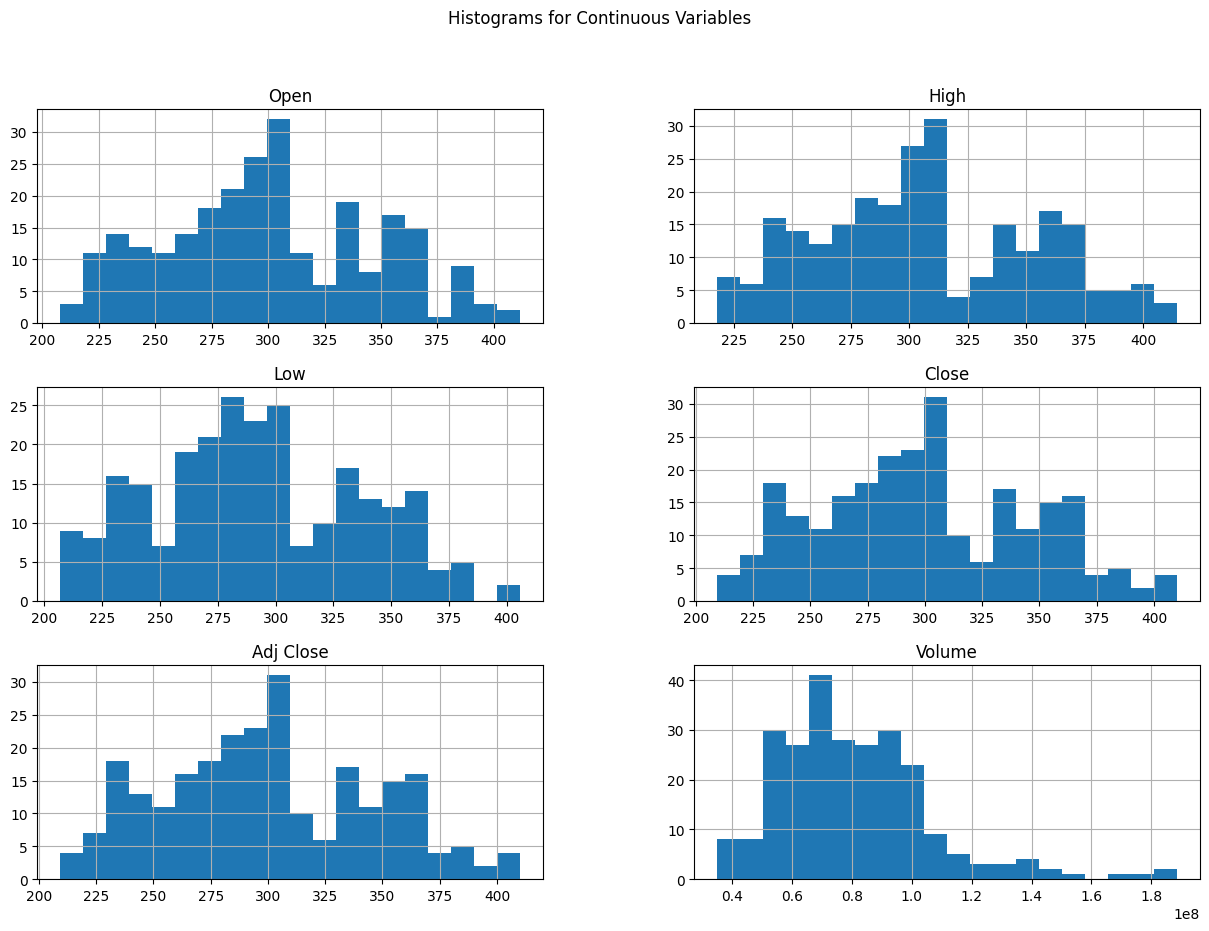

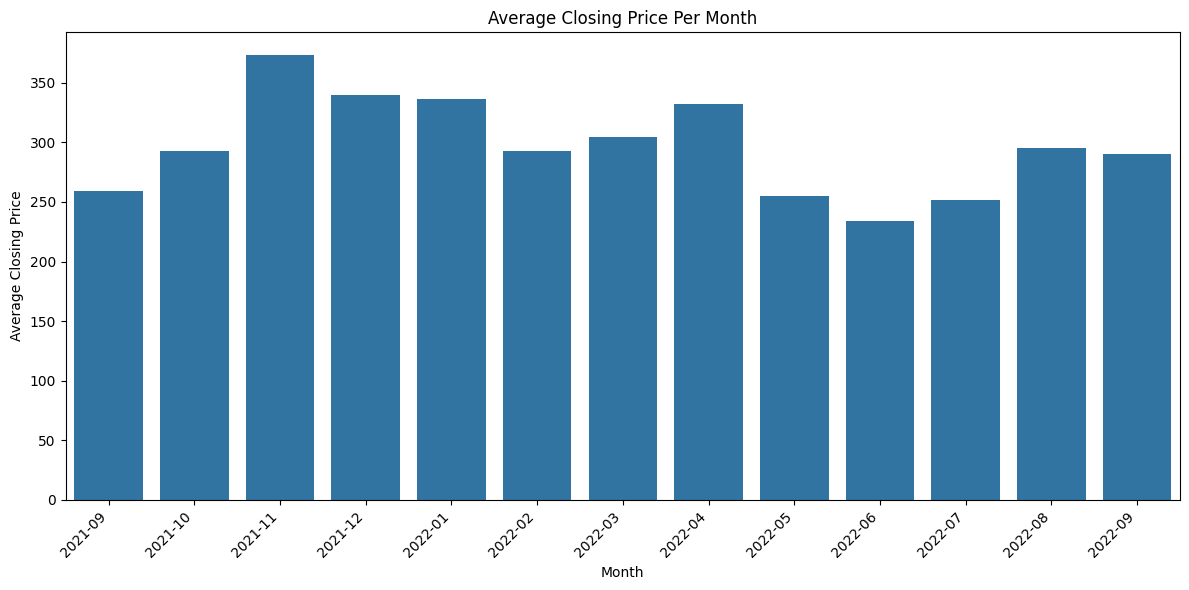

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tesla_data = pd.read_csv('/Users/jamesletim/Downloads/joever/TESLA.csv')

# Plot histograms for continuous variables
continuous_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
tesla_data[continuous_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Continuous Variables')
plt.show()

# Plot bar chart for average closing price per month
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data['Month'] = tesla_data['Date'].dt.to_period('M')
average_close_per_month = tesla_data.groupby('Month')['Close'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_close_per_month.index.astype(str), y=average_close_per_month.values)
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price Per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Step 7. Observations**

Histograms for Stock Prices and Volume:
* Stock prices (Open, High, Low, Close, Adj close) show similar distributions, indicating typical price ranges and trading activity.

* The volume histogram displays right-skewed distribution - days of high trading are infrequent.

Bar Chart for Monthly Average Closing Prices:
* Fluctuation in average prices over months.

* Help identify months with high or low averages.

Analysis Implication
* Close relationship among the price columns and distribution for feature selection for predictive modeling.

* Monthly trends in closing prices may suggest time-based features.

* Further monitoring for features that show potential predicitive value or outliers.
Feature Selection Consideration:

* All observed features are initially retained for deeper analysis, with further refinement to follow based on correlation and feature importance metrics.

#### **Step 8. Feature Selection Based on Data Distribution**

* All observed features are initially retained for deeper analysis, with further refinement to follow based on correlation and feature importance metrics.




#### **Step 9. Removal of outliers and missing values**

* In reference to Step 7, Visual Exploratory Data Analysis of Data (with Histogram and Barcharts), we remove any outliers and address missing values.

* Outliers are data points that significantly differ from the rest of the data and can distort statistical analyses.

* The Interquartile Range (IQR) method is employed to detect potential outliers within each continuous variable.
For each column, the first quartile (Q1), third quartile (Q3), and IQR are calculated.

* A lower bound and upper bound are defined as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively.
Any data points outside these bounds are considered potential outliers and stored in a dictionary named 'outliers'.


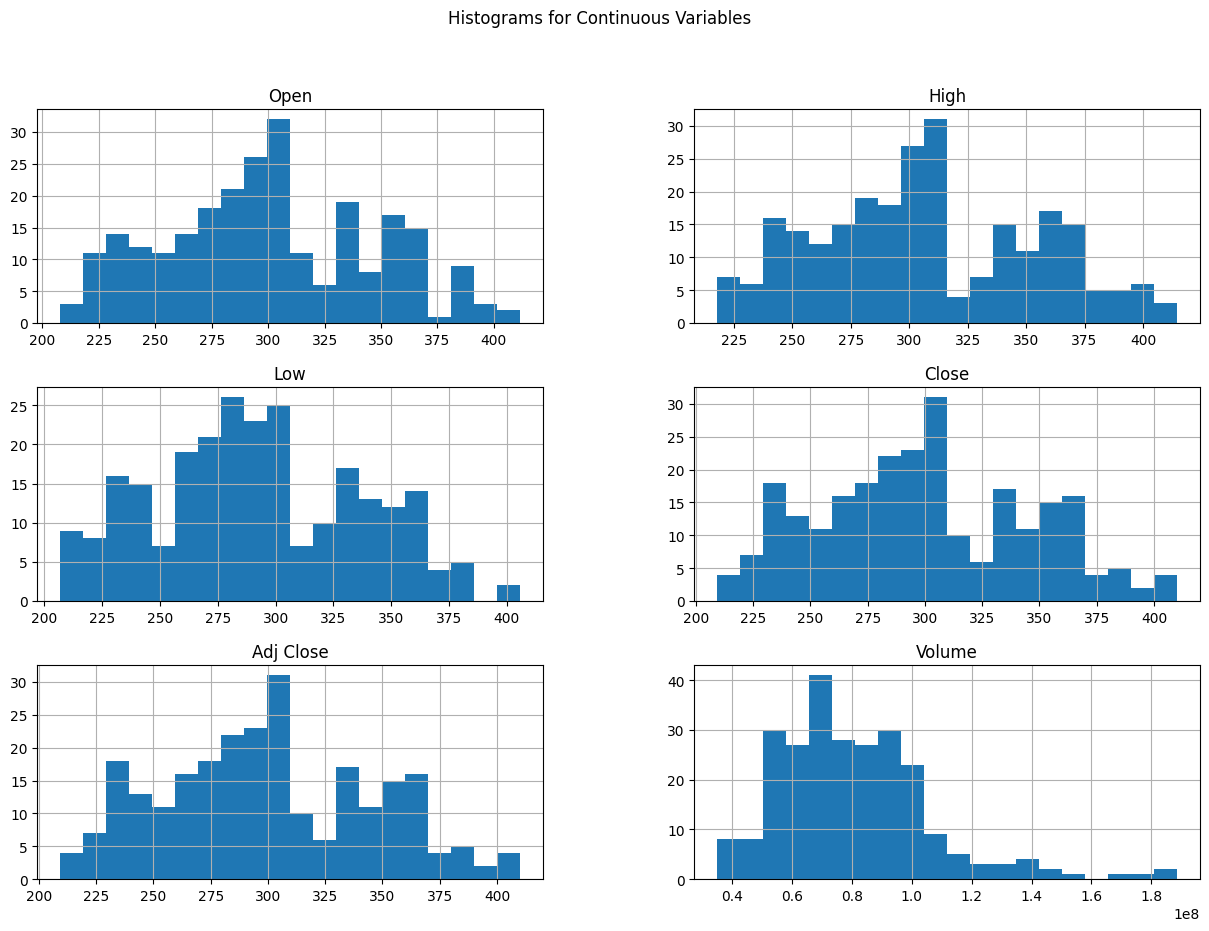

No outliers detected in Open.

No outliers detected in High.

No outliers detected in Low.

No outliers detected in Close.

No outliers detected in Adj Close.

Outliers in Volume:
18     188556300
19     187245000
23     168146100
29     177317400
80     151565700
83     147109500
156    140313000
162    144973200
203    142032300
Name: Volume, dtype: int64



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')
# Plot histograms for continuous variables
continuous_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
tesla_data[continuous_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Continuous Variables')
plt.show()

# Identify potential outliers using the IQR method
outliers = {}
for column in continuous_columns:
    column_data = tesla_data[column]
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

for column, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"Outliers in {column}:\n{outlier_values}\n")
    else:
        print(f"No outliers detected in {column}.\n")


#### **Step 9. Observation** 

* As the aglorithim tries to incorporate the extreme value, it goes away from majority of the data.

* We can handle outliers via two methods: Delete the outlier, or replace the outlier with the nearest possible value.

* Outliers can be replaced with alternative values, such as the nearest possible value or a statistically derived value.

* Deletion of outliers is a easier solution though it can lead to loss of valuable information. It can reduce the sample size and statistical power of the analysis.

* Replacing outliers could obscure genuine patterns or trends in the data if replaced values do not reflect the underlying characteristics.

* Opting for replacing them with more representative values ensures the preservation of data integrity while mitigating the impact of extreme values on the analysis.












#### **Step 9.1. Replace Outlier with Nearest Possible Value**

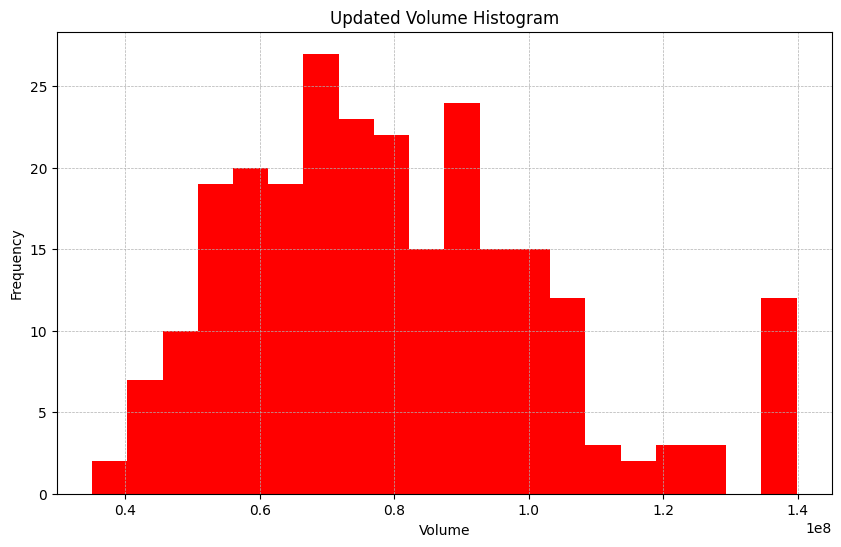

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Calculate IQR for Volume column
volume = tesla_data['Volume']
Q1 = volume.quantile(0.25)
Q3 = volume.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
volume = np.where(volume < lower_bound, lower_bound, volume)
volume = np.where(volume > upper_bound, upper_bound, volume)
tesla_data['Volume'] = volume

# Plot the updated volume graph with grid lines
plt.figure(figsize=(10, 6))
plt.hist(volume, bins=20, color='red')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Updated Volume Histogram')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### **Step 9.1. Observation**



* The updated volume histogram shows a more compressed range, indicating that outliers have been replaced with more typical values.

* The distribution might appear more uniform, with fewer extreme tails, reflecting a closer representation of regular trading activity.

* The updated graph should align better with typical volume patterns, which can improve predictive modeling accuracy by focusing on the majority of data points rather than outliers.

#### **Step 9.2. Missing Values Analysis**

* If the output shows that any of the selected continuous columns (Open, High, Low, Close, Adj Close, Volume) contain missing values, it indicates that there are gaps in the data for these metrics.

* Conversely, if there are no missing values, it means all the relevant data points are complete, which is ideal for analysis and modeling.

* If only one or two columns have missing values, it might indicate issues with specific data points or data recording errors.

* If multiple columns have missing values simultaneously, it could suggest systemic issues in data collection or reporting.

In [ ]:
import pandas as pd

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Check for missing values in selected continuous columns
continuous_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
missing_values = tesla_data[continuous_columns].isnull().sum()

# Display missing values
print("Missing values in selected continuous columns:")
print(missing_values)

Missing values in selected continuous columns:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### **Step 9.2. Observations**

* There are no missing values in this Dataset.

#### **Step 10.  Visual and Statistic Correlation Analysis for Selection of Best Features**

#### **Step 10.1. Continuous Versus Continuous**
Benefits of Analyzing Continuous Variables:
* Pattern Recognition: Scatter plots visually reveal patterns or trends in data.

* Correlation Assessment: Scatter plots help assess the correlation coefficient between variables.

* Feature Prioritisation: Understanding variable relationships aids in selecting relevant features for predictive modeling.

* Model Interpretation: Visualising relationships assists in interpreting how predictors influence the target variable.

* Data Quality Improvement: Identification of outliers or unusual patterns guides data cleaning for better model accuracy.

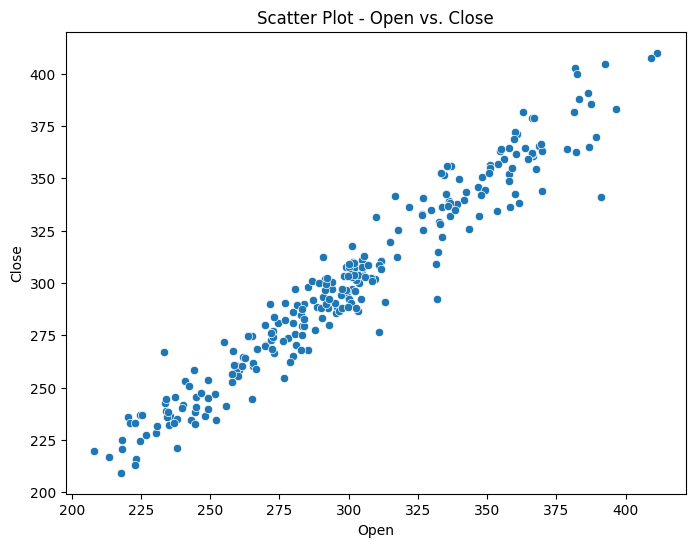

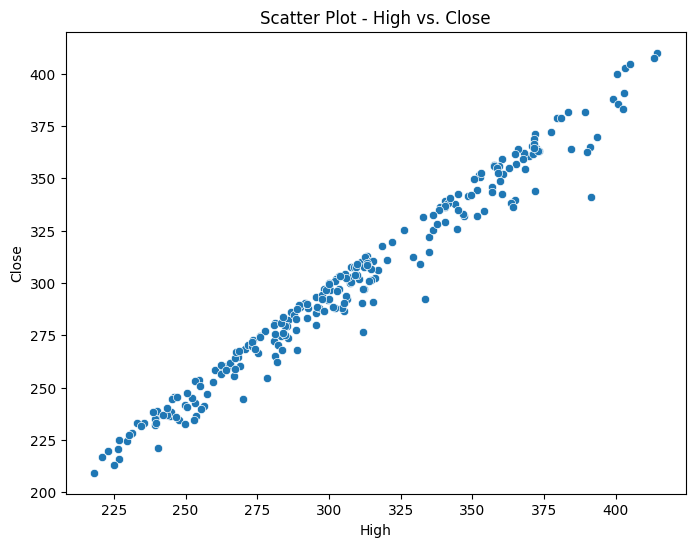

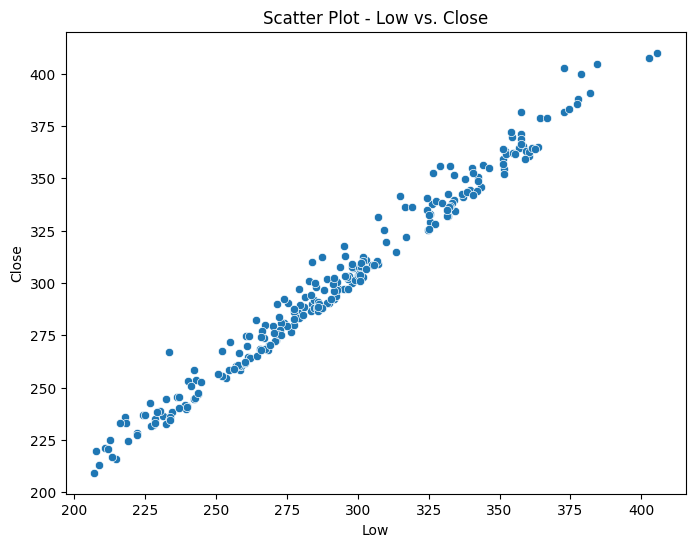

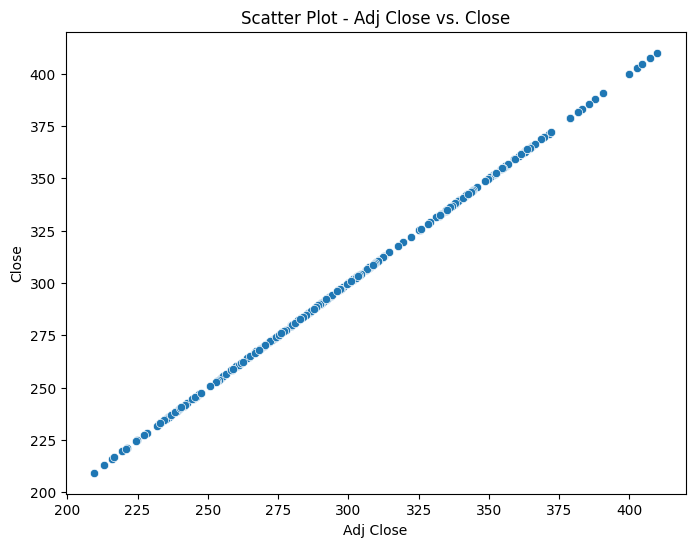

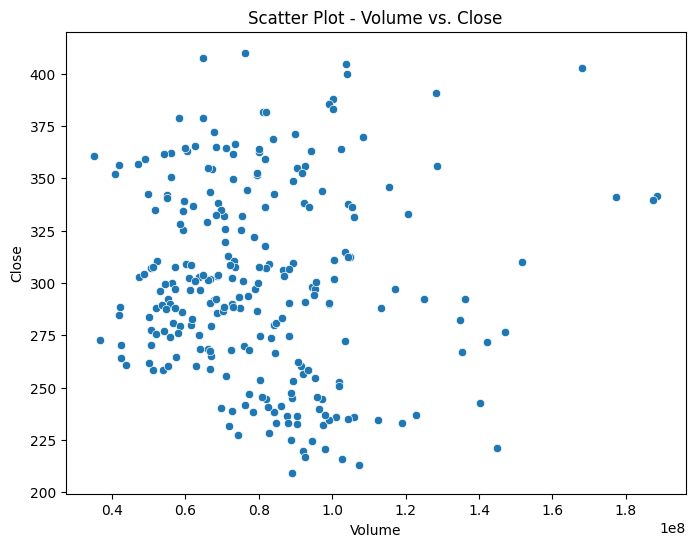

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select the relevant columns
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close']
numeric_data = tesla_data[selected_columns]

# 2. Scatter Plots
for column in selected_columns:
    if column != 'Close':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=numeric_data, x=column, y='Close')
        plt.title(f'Scatter Plot - {column} vs. Close')
        plt.show()

#### **10.2. Correlation Analysis**

Performing correlation analysis:
* The code calculates a correlation matrix for the selected columns.

* This matrix shows the relationship between each pair of columns.

* The code uses a heatmap to visualise the correlation matrix.

* A heatmap effectively highlights the strength and direction of relationships using color gradients.

* A correlation value between [-1, 0) indicates an inverse relationship, which typically shows a downward trend.

* A correlation value between (0, 1] indicates a direct relationship, usually showing an upward trend.

* A correlation near {0} suggests no clear relationship, often reflected in a scattered plot.

* If the correlation value between two variables is > 0.5 in magnitude, it indicates a strong relationship, regardless of the sign.

* The code observes correlations to identify which features are related to the target variable.

* The code uses Pearson’s correlation coefficient for analysis.

* This coefficient is calculated as the covariance between two features divided by the product of their standard deviations.

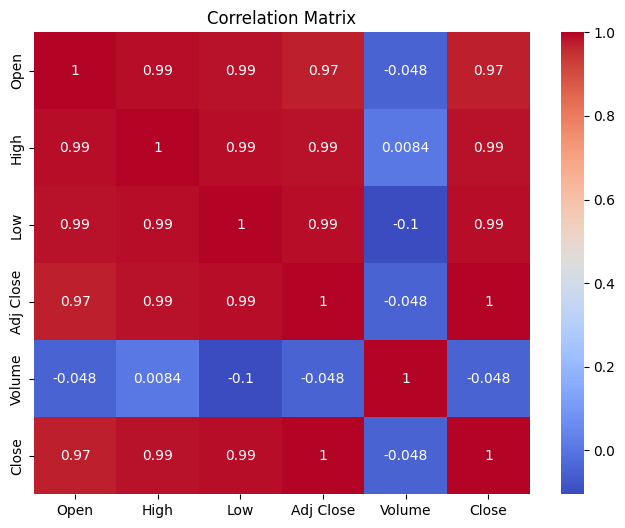

Correlations with 'Close':
Open         0.971783
High         0.986715
Low          0.990137
Adj Close    1.000000
Volume       0.047791
Name: Close, dtype: float64
Final selected columns for predicting 'Close':
['Open', 'High', 'Low', 'Adj Close']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select the relevant columns
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close']
numeric_data = tesla_data[selected_columns]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'Close'
correlations_with_close = correlation_matrix['Close'].drop('Close').abs()
print("Correlations with 'Close':")
print(correlations_with_close)

# Select final columns based on high correlation with 'Close'
threshold = 0.7
final_columns = correlations_with_close[correlations_with_close > threshold].index.tolist()

print("Final selected columns for predicting 'Close':")
print(final_columns)

#### **Step 10.2. Observations**

* The heatmap visualises the correlation matrix, where each cell represents the correlation coefficient between two variables.

* Higher absolute values indicate stronger correlations, with values closer to 1 indicating a stronger linear relationship.

* Based on the chosen threshold (0.7), the final selected columns for predicting 'Close' are displayed.

* Final selected continous columns: Open, High, Low, and Adj Close.

#### **Step 11. Data Conversion to Numeric Values**

* This step focuses on converting the relevant columns to numeric values.

* By extracting and analysing continuous columns, the aim is to facilitate mathematical operations and statistical analysis.

* The selected columns, such as 'Open', 'High', 'Low', 'Adj Close', and 'Close', are all continuous numerical variables relevant to stock prices.

* These columns provide critical insights into Tesla's stock performance.

* By printing sample rows, this step ensures that the data looks as expected after selection.

* This is important for verifying that the correct columns have been chosen and that the data is properly formatted.


In [ ]:
import pandas as pd

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select relevant continuous columns based on earlier analysis
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
continuous_data = tesla_data[selected_columns]

# Printing sample rows
print("Sample rows of the data:")
print(continuous_data.head())

Sample rows of the data:
         Open        High         Low   Adj Close       Close
0  259.933319  264.500000  256.893341  260.436676  260.436676
1  260.333344  263.043335  258.333344  258.493347  258.493347
2  259.466675  260.260010  254.529999  258.406677  258.406677
3  265.500000  268.989990  258.706665  260.510010  260.510010
4  261.600006  265.769989  258.066681  260.196655  260.196655


#### **Step 11. Observations**

* The selected columns represent key financial metrics, typically needed for predictive modelling and analysis of stock performance.

* Ensuring the data is numeric is crucial since non-numeric data types can disrupt statistical calculations and machine learning algorithms.

* Displaying sample rows helps identify any potential issues early on, such as missing or mislabelled data.

* After this step, the data is prepared for subsequent tasks like visualisation, modelling, or any other numerical analysis.

#### **Step 11.2. Standardisation/Normalisation of Data**

* Needed for Neural Networks (method)

* Standardisation ensures all features have a mean of 0 and a standard deviation of 1, while normalization scales data to a range between 0 and 1.

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select the relevant continuous columns
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
data_to_transform = tesla_data[selected_columns]

# Standardisation
scaler = StandardScaler()
standardised_data = scaler.fit_transform(data_to_transform)
standardised_df = pd.DataFrame(standardised_data, columns=selected_columns)

print("Standardised data (mean = 0, std = 1):")
print(standardised_df.head())

# Normalisation
normaliser = MinMaxScaler()
normalised_data = normaliser.fit_transform(data_to_transform)
normalised_df = pd.DataFrame(normalised_data, columns=selected_columns)

print("\nNormalised data (range = 0 to 1):")
print(normalised_df.head())

Standardised data (mean = 0, std = 1):
       Open      High       Low  Adj Close     Close
0 -0.873061 -0.920524 -0.789756  -0.859396 -0.859396
1 -0.864373 -0.951718 -0.757467  -0.901922 -0.901922
2 -0.883194 -1.011321 -0.842750  -0.903818 -0.903818
3 -0.752172 -0.824373 -0.749096  -0.857791 -0.857791
4 -0.836866 -0.893328 -0.763447  -0.864648 -0.864648

Normalised data (range = 0 to 1):
       Open      High       Low  Adj Close     Close
0  0.255421  0.236749  0.251681   0.254508  0.254508
1  0.257387  0.229337  0.258924   0.244819  0.244819
2  0.253128  0.215174  0.239793   0.244387  0.244387
3  0.282773  0.259596  0.260802   0.254873  0.254873
4  0.263610  0.243211  0.257583   0.253311  0.253311


#### **Step 12. Training/Testing Sampling and K-Fold Cross-Validation**

* Evaluate a neural network regression model's performance using an 80/20 training/testing split and K-fold cross-validation.

* This helps in assessing the model’s stability and accuracy.

* K-fold cross-validation divides the training data into k subsets, training on k-1 subsets while testing on the remaining subset, rotating through all subsets.

* Measure the R-squared value for each fold to assess the model’s performance.

* This will indicate how well the neural network regression model performs with different data splits.

In [39]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score

tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
continuous_data = tesla_data[selected_columns]

target_variable = 'Close'
predictors = ['Open', 'High', 'Low', 'Adj Close']
X = continuous_data[predictors].values
y = continuous_data[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

reg_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=428)

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=428)
cv_results = cross_val_score(reg_model, X_train, y_train, cv=kf, scoring='r2')

print(f"R2 scores for each fold: {cv_results}")
print(f"Average R2 score across all folds: {np.mean(cv_results)}")

R2 scores for each fold: [0.66658184 0.20113804 0.73107596 0.69285081 0.43325369 0.66543135
 0.77433728 0.19741108 0.53798634 0.48230947]
Average R2 score across all folds: 0.538237586522743


#### **Step 12. Observation**

* An 80/20 split ensures the model has sufficient data to learn from while keeping a testing set for evaluation.

* This ratio balances training needs and evaluation accuracy.

* K-fold cross-validation provides a more comprehensive evaluation by training and testing the model multiple times with different data splits.

* This method helps detect overfitting and ensures the model's generalisation capabilities.
Scoring:

* Using R-squared as a scoring metric aligns with common regression evaluation practices. This metric indicates how well the model's predictions align with actual outcomes.

#### **Step 13. Investigating Multiple Regression Algorithms**

* Investigate and compare multiple regression algorithms for predicting Tesla's closing stock prices.

* This helps in selecting the most suitable model for the task.

#### **Method 1. Linear Regression Model**

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select relevant continuous columns
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
continuous_data = tesla_data[selected_columns]

# Separate target variable and predictor variables
target_variable = 'Close'
predictors = ['Open', 'High', 'Low', 'Adj Close']
X = continuous_data[predictors].values
y = continuous_data[target_variable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Initialise the Linear Regression model
reg_model = LinearRegression()
print(f"Linear Regression Model Parameters:\n{reg_model}")

# Train the model on the training data
LREG = reg_model.fit(X_train, y_train)
predictions = LREG.predict(X_test)

# Measure goodness of fit on training data
r2_value = metrics.r2_score(y_train, LREG.predict(X_train))
print(f"\nR2 Value on training data: {r2_value:.2f}")

# Display testing results
print("\nCalculations (Output)")

# Create a DataFrame for testing results
testing_data_results = pd.DataFrame(data=X_test, columns=predictors)
testing_data_results[target_variable] = y_test
testing_data_results[f'Predicted {target_variable}'] = np.round(predictions)

# Calculate error for each row
testing_data_results['APE'] = 100 * abs(
    (testing_data_results[target_variable] - testing_data_results[f'Predicted {target_variable}']) / testing_data_results[target_variable])

# Calculate mean and median accuracy
MAPE = np.mean(testing_data_results['APE'])
median_MAPE = np.median(testing_data_results['APE'])
accuracy = 100 - MAPE
median_accuracy = 100 - median_MAPE
print(f"Mean Accuracy on test data: {accuracy:.2f}%")
print(f"Median Accuracy on test data: {median_accuracy:.2f}%")

# Define a custom function to calculate accuracy
def accuracy_score_custom(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom Scoring MAPE calculation
custom_scoring = make_scorer(accuracy_score_custom, greater_is_better=True)

# Run 10-fold cross-validation
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring=custom_scoring)
accuracy_values_str = ', '.join(f"{accuracy:.2f}%" for accuracy in accuracy_values)
average_accuracy = round(accuracy_values.mean(), 2)
print(f"\nAccuracy values for 10-fold Cross Validation: {accuracy_values_str}")
print(f"Final Average Accuracy of the model: {average_accuracy}%")

Linear Regression Model Parameters:
LinearRegression()

R2 Value on training data: 1.00

Calculations (Output)
Mean Accuracy on test data: 99.92%
Median Accuracy on test data: 99.92%

Accuracy values for 10-fold Cross Validation: 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%
Final Average Accuracy of the model: 100.0%


#### **Method 2. Decision Tree Regressor**

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select relevant continuous columns
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
continuous_data = tesla_data[selected_columns]

# Separate target variable and predictor variables
target_variable = 'Close'
predictors = ['Open', 'High', 'Low', 'Adj Close']
X = continuous_data[predictors].values
y = continuous_data[target_variable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Initialise the Decision Tree Regressor model
reg_model = DecisionTreeRegressor()
print(f"Decision Tree Regressor Model Parameters:\n{reg_model}")

# Train the model on the training data
DTREG = reg_model.fit(X_train, y_train)
predictions = DTREG.predict(X_test)

# Measure goodness of fit on training data
r2_value = metrics.r2_score(y_train, DTREG.predict(X_train))
print(f"\nR2 Value on training data: {r2_value:.2f}")

# Display testing results
print("\nCalculations (output)")

# Create a DataFrame for testing results
testing_data_results = pd.DataFrame(data=X_test, columns=predictors)
testing_data_results[target_variable] = y_test
testing_data_results[f'Predicted {target_variable}'] = np.round(predictions)

# Calculate error for each row
testing_data_results['APE'] = 100 * abs(
    (testing_data_results[target_variable] - testing_data_results[f'Predicted {target_variable}']) / testing_data_results[target_variable])

# Calculate mean and median accuracy
MAPE = np.mean(testing_data_results['APE'])
median_MAPE = np.median(testing_data_results['APE'])
accuracy = 100 - MAPE
median_accuracy = 100 - median_MAPE
print(f"Mean Accuracy on test data: {accuracy:.2f}%")
print(f"Median Accuracy on test data: {median_accuracy:.2f}%")

# Define a custom function to calculate accuracy
def accuracy_score_custom(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom Scoring MAPE calculation
custom_scoring = make_scorer(accuracy_score_custom, greater_is_better=True)

# Run 10-fold cross-validation
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring=custom_scoring)
accuracy_values_str = ', '.join(f"{accuracy:.2f}%" for accuracy in accuracy_values)
average_accuracy = round(accuracy_values.mean(), 2)
print(f"\nAccuracy values for 10-fold Cross Validation: {accuracy_values_str}")
print(f"Final Average Accuracy of the model: {average_accuracy}%")

Decision Tree Regressor Model Parameters:
DecisionTreeRegressor()

R2 Value on training data: 1.00

Calculations (output)
Mean Accuracy on test data: 99.61%
Median Accuracy on test data: 99.80%

Accuracy values for 10-fold Cross Validation: 99.44%, 99.61%, 99.52%, 99.62%, 99.79%, 99.64%, 99.52%, 99.20%, 99.87%, 99.82%
Final Average Accuracy of the model: 99.6%


#### **Method 3. Neural Network Regressor**

In [45]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select relevant continuous columns
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
continuous_data = tesla_data[selected_columns]

# Separate target variable and predictor variables
target_variable = 'Close'
predictors = ['Open', 'High', 'Low', 'Adj Close']
X = continuous_data[predictors].values
y = continuous_data[target_variable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Initialise the Neural Network Regressor model
reg_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=428)
print(f"Neural Network Regressor Model Parameters:\n{reg_model}")

# Train the model on the training data
NNREG = reg_model.fit(X_train, y_train)
predictions = NNREG.predict(X_test)

# Measure goodness of fit on training data
r2_value = metrics.r2_score(y_train, NNREG.predict(X_train))
print(f"\nR2 Value on training data: {r2_value:.2f}")

# Display testing results
print("\nCalculations (output)")

# Create a DataFrame for testing results
testing_data_results = pd.DataFrame(data=X_test, columns=predictors)
testing_data_results[target_variable] = y_test
testing_data_results[f'Predicted {target_variable}'] = np.round(predictions)

# Calculate error for each row
testing_data_results['APE'] = 100 * abs(
    (testing_data_results[target_variable] - testing_data_results[f'Predicted {target_variable}']) / testing_data_results[target_variable])

# Calculate mean and median accuracy
MAPE = np.mean(testing_data_results['APE'])
median_MAPE = np.median(testing_data_results['APE'])
accuracy = 100 - MAPE
median_accuracy = 100 - median_MAPE
print(f"Mean Accuracy on test data: {accuracy:.2f}%")
print(f"Median Accuracy on test data: {median_accuracy:.2f}%")

# Define a custom function to calculate accuracy
def accuracy_score_custom(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom Scoring MAPE calculation
custom_scoring = make_scorer(accuracy_score_custom, greater_is_better=True)

# Run 10-fold cross-validation
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring=custom_scoring)
accuracy_values_str = ', '.join(f"{accuracy:.2f}%" for accuracy in accuracy_values)
average_accuracy = round(accuracy_values.mean(), 2)
print(f"\nAccuracy values for 10-fold Cross Validation: {accuracy_values_str}")
print(f"Final Average Accuracy of the model: {average_accuracy}%")

Neural Network Regressor Model Parameters:
MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=428)

R2 Value on training data: 0.62

Calculations (output)
Mean Accuracy on test data: 91.04%
Median Accuracy on test data: 91.06%

Accuracy values for 10-fold Cross Validation: 99.05%, 99.83%, 99.81%, 99.72%, 98.28%, 98.16%, 99.72%, 99.84%, 99.82%, 99.76%
Final Average Accuracy of the model: 99.4%


  #### **Step 14. Selection of The Best Model**


* Based on the three different algorithims conducted, we will choose the most accurate method.

* Linear Regression Model (first method) is chosen.

* Although all three preformed very well, the first model managed to consistently achieve near perfect accuracy

#### **Step 15. Deployment of The Best Model in Production**

* The model is integrated into the target application or system, such as a financial tool, a web application, or a desktop GUI.

* Involves creating a function or API endpoint that accepts input data, processes it using the model, and returns the prediction. (optional)

* Serialisation involves saving the trained model to a file, which allows you to load it in future sessions without needing to retrain it each time.

#### **Step 15.1 Train Linear Regression Model and Saving Model (serialised)**

* The code then saves the trained model as a serialized file (.pkl) using the pickle module. This is useful for deploying the model later without retraining it each time.

* The final print statement shows the current working directory where the model file is saved, which helps locate the file for subsequent use.


In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
import os

# Load the data
tesla_data = pd.read_csv(r'/Users/jamesletim/Downloads/joever/TESLA.csv')

# Select relevant continuous columns
selected_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
continuous_data = tesla_data[selected_columns]

# Separate target variable and predictor variables
target_variable = 'Close'
predictors = ['Open', 'High', 'Low', 'Adj Close']
X = continuous_data[predictors].values
y = continuous_data[target_variable].values

# Initialise and train the Linear Regression model on all available data
reg_model = LinearRegression()
reg_model.fit(X, y)

# Get the script directory, with a fallback for interactive environments
try:
    script_directory = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_directory = os.getcwd()

# Save the trained model as a serialised file
model_file_path = os.path.join(script_directory, "linear_regression_model.pkl")

with open(model_file_path, "wb") as model_file:
    pickle.dump(reg_model, model_file)

print('Saved in location:', model_file_path)

Saved in location: /Users/jamesletim/Downloads/joever/linear_regression_model.pkl


#### **Step 15.2. Create a Python Function for Predictions (only for websites for API)**

* This function can be used for websites.

* The function is well-suited for integration into financial software tools or applications where stock price prediction is a key feature.

* It can provide real-time insights for financial modeling, portfolio management, or risk assessment.

* No deployment within this report.

In [48]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

def predict_closing_price(input_data):

    # Load the previously used dataset to align input columns
    training_data = pd.read_pickle('TrainingData.pkl')
    input_data = pd.concat([input_data, training_data], ignore_index=True)

    # Generating dummy variables
    input_data = pd.get_dummies(input_data)

    # Define the column order as during model training
    predictors = ['Open', 'High', 'Low', 'Adj Close']

    # Standardise the input data
    X = input_data[predictors].values[:len(input_data)]

    # Load the scaler
    with open('Scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    X = scaler.transform(X)

    # Load the trained model
    with open('LinearRegression_Model.pkl', 'rb') as model_file:
        prediction_model = pickle.load(model_file)

    # Generate predictions
    predictions = prediction_model.predict(X)
    prediction_result = pd.DataFrame(predictions, columns=['Prediction'])
    return prediction_result


#### **Step 16. GUI (Tkinter)**

* Graphical User Interface version of the Tesla Stock Predictor (next day)



In [50]:
import tkinter as tk
from tkinter import ttk
import pickle
import numpy as np

with open("linear_regression_model.pkl", "rb") as model_file:
    reg_model = pickle.load(model_file)

def predict_closing_price(open_price, high_price, low_price, adj_close_price):
    input_data = np.array([[open_price, high_price, low_price, adj_close_price]])
    prediction = reg_model.predict(input_data)
    return prediction[0]

window = tk.Tk()
window.title("Tesla Closing Price Predictor")

labels = ['Open Price', 'High Price', 'Low Price', 'Adj Close Price']
entries = {}

for label in labels:
    frame = ttk.Frame(window)
    frame.pack(fill='x', padx=5, pady=5)
    lbl = ttk.Label(frame, text=label)
    lbl.pack(side='left', padx=5, pady=5)
    entry = ttk.Entry(frame)
    entry.pack(side='left', padx=5, pady=5)
    entries[label] = entry

def handle_predict():
    open_price = float(entries['Open Price'].get())
    high_price = float(entries['High Price'].get())
    low_price = float(entries['Low Price'].get())
    adj_close_price = float(entries['Adj Close Price'].get())
    result = predict_closing_price(open_price, high_price, low_price, adj_close_price)
    result_label.config(text=f"Predicted Closing Price: {result}")

predict_button = ttk.Button(window, text="Predict", command=handle_predict)
predict_button.pack(padx=5, pady=5)

result_label = ttk.Label(window, text="")
result_label.pack(padx=5, pady=5)

window.mainloop()

# **End of Report**